In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

In [2]:
df=pd.read_csv("testset.csv")

In [3]:
df.head()

datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
0  19961101-11:00   Smoke       9.0      0       0           NaN   27.0   
1  19961101-12:00   Smoke      10.0      0       0           NaN   32.0   
2  19961101-13:00   Smoke      11.0      0       0           NaN   44.0   
3  19961101-14:00   Smoke      10.0      0       0           NaN   41.0   
4  19961101-16:00   Smoke      11.0      0       0           NaN   47.0   

    _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
0        NaN       1010.0       0       0     30.0          0          0   
1        NaN      -9999.0       0       0     28.0          0          0   
2        NaN      -9999.0       0       0     24.0          0          0   
3        NaN       1010.0       0       0     24.0          0          0   
4        NaN       1011.0       0       0     23.0          0          0   

    _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
0     5.0    280.0    West       NaN           NaN      7.4  
1     NaN      0.0   North       NaN           NaN      NaN  
2     NaN      0.0   North       NaN           NaN      NaN  
3     2.0      0.0   North       NaN           NaN      NaN  
4     1.2      0.0   North       NaN           NaN      0.0

In [4]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [5]:
df.columns = map(lambda x:x.strip() , df.columns)

In [6]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [7]:
df._conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

[]

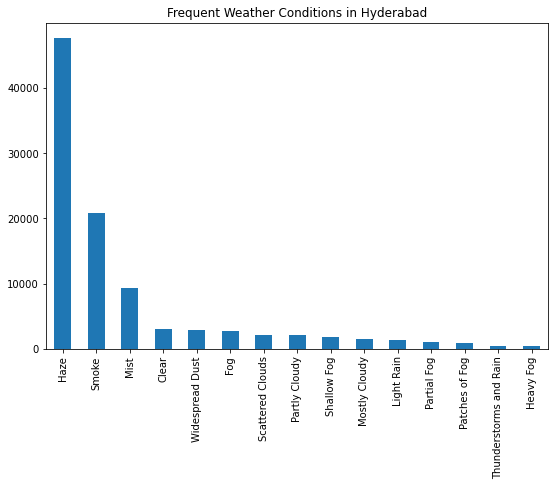

In [8]:
# * most common weather conditions in Hyderabad
plt.figure(figsize=(9,6))
df._conds.value_counts().head(15).plot(kind='bar')
plt.title("Frequent Weather Conditions in Hyderabad")
plt.plot()

[]

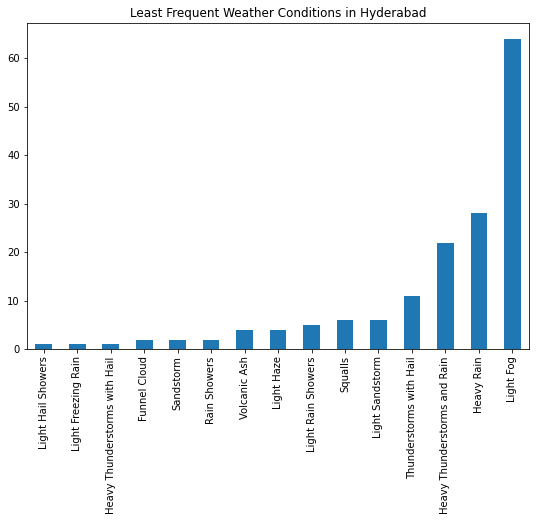

In [9]:
# * Least common weather conditions in Hyderabad
plt.figure(figsize=(9,6))
df._conds.value_counts(ascending=True).head(15).plot(kind='bar')
plt.title("Least Frequent Weather Conditions in Hyderabad")
plt.plot()

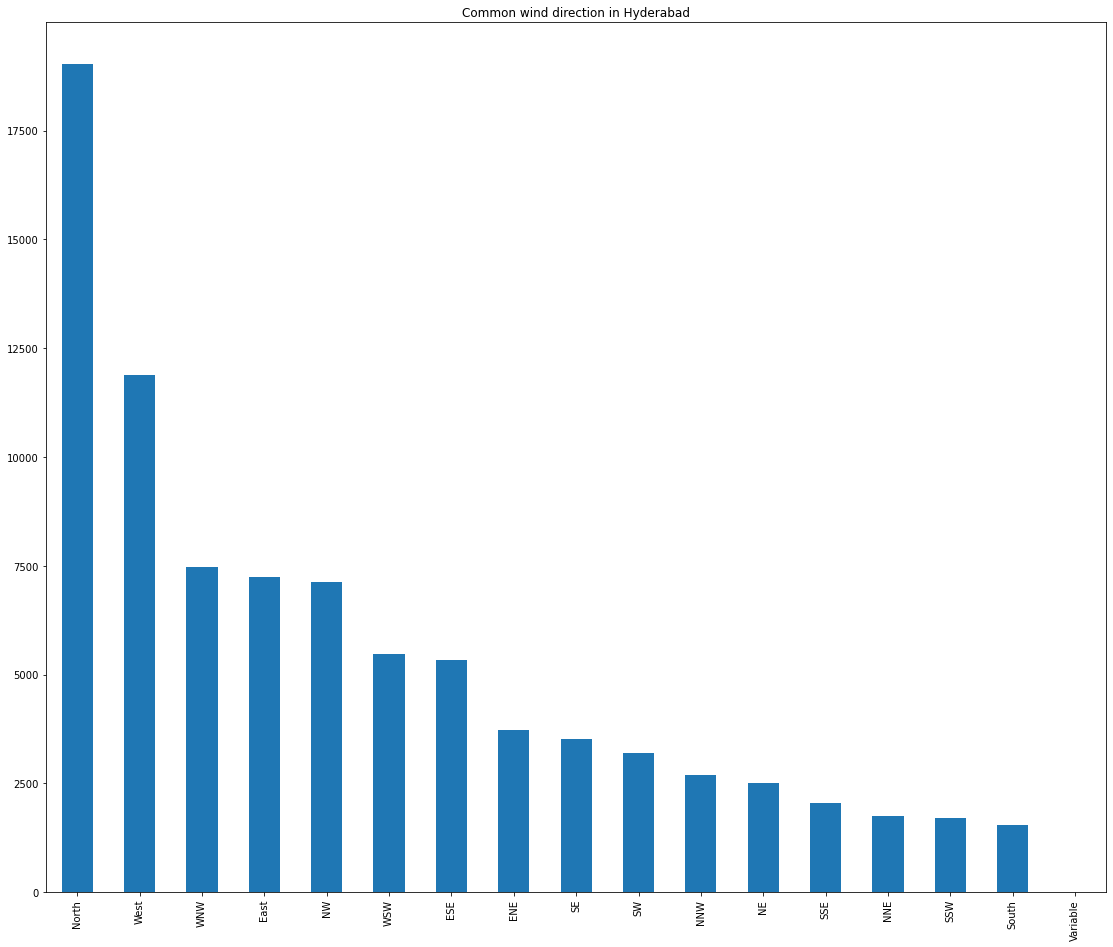

In [10]:
plt.figure(figsize=(9, 6));
plt.title("Common wind direction in Hyderabad");
df._wdire.value_counts().plot(kind="bar");
plt.plot();


In [49]:
# * Average Temperature in Hyderabad
print("Average Temperature : ",round(df._tempm.mean(axis=0),2))


Average Temperature :  25.45


In [12]:
# * Extracting Month and Year for all given data points
def extract_year(value):
    return (value[0:4])

def extract_month(value):
    return (value[4:6])

df["year"]=df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"]=df["datetime_utc"].apply(lambda x:extract_month(x))

In [13]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [14]:
df.groupby("year")._tempm.mean()


# * Humidity Mean for each year


df.groupby("year")._hum.mean()


# * Pressure Mean for each year


df.groupby("year")._pressurem.mean()


# ## Handling Missing Data

# * Count of null values in each column/feature


df.isnull().sum()


df.columns


df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail','_hum', '_pressurem', '_rain', '_snow', '_tempm','_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wspdm', 'year', "month"]]


# * Checking for null values in dew feature


df_filtered[df_filtered._dewptm.isnull()]


# * Replacing each null value of dewptm with the mean value of dewptm for that year


for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean=df_filtered[df_filtered["year"]==row["year"]]._dewptm.mean()
    df_filtered.at[index,"_dewptm"]=mean


# * Now there are no null values for dewptm

df_filtered[df_filtered._dewptm.isnull()]


df_filtered.isnull().sum()


# * Checking for null values in humidity


df_filtered[df_filtered._hum.isnull()]


# * Replacing each null value of hum with the mean value of hum for that year


for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val


df_filtered[df_filtered._hum.isnull()]


df_filtered.isnull().sum()


# * Checking for null values in pressure feature/column


df_filtered[df_filtered._pressurem.isnull()]



df_filtered.head()


df_filtered._pressurem.isnull().sum()


# * Replacing each null value of pressure with the mean value of pressure for that year


for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val


df_filtered.isnull().sum()


# * Replacing each null value of temp with the mean value of temp for that year


for i,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[i, "_tempm"] = mean


# * Replacing each null value of vis with the mean value of vis for that year


for i,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[i, "_vism"] = mean


# * Replacing each null value of wind with the mean value of wind for that year


for i,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[i, "_wdird"] = mean


# * Replacing each null value of windspeed with the mean value of windspeed for that year


for i,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[i, "_wspdm"] = mean


# ******* Replacing each null value of wind direction with the most frequent values of wind direction for that year


for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent


# ******* Replacing each null value of weather condition with the most frequent values of weather condition for that year

for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

df_filtered.isnull().sum()

datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [16]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']
df_final=df_filtered[feature_columns]

In [17]:
wdire_dummies=pd.get_dummies(df_final["_wdire"])
df_final=pd.concat([wdire_dummies,df_final],axis=1)
df_final.drop("_wdire",inplace=True,axis=1)

In [18]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [19]:
selected_columns=df_final[["_dewptm","_hum","_thunder","_wspdm","_tempm","_pressurem","_snow"]]

In [20]:
selected_columns.to_csv("df.csv")

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
selected_columns=df_final[["_dewptm","_hum","_thunder","_wspdm","_tempm","_pressurem","_snow"]]

out_put=df_final[["_rain"]]

selected_columns

_dewptm  _hum  _thunder     _wspdm  _tempm  _pressurem  _snow
0           9.0  27.0         0   7.400000    30.0      1010.0      0
1          10.0  32.0         0   5.052735    28.0     -9999.0      0
2          11.0  44.0         0   5.052735    24.0     -9999.0      0
3          10.0  41.0         0   5.052735    24.0      1010.0      0
4          11.0  47.0         0   0.000000    23.0      1011.0      0
...         ...   ...       ...        ...     ...         ...    ...
100985     17.0  25.0         0  11.100000    34.0      1005.0      0
100986     14.0  16.0         0  22.200000    38.0      1003.0      0
100987     12.0  14.0         0  18.500000    36.0      1002.0      0
100988     15.0  27.0         0   3.700000    32.0      1004.0      0
100989     15.0  30.0         0   3.700000    30.0      1005.0      0

[100990 rows x 7 columns]

In [23]:
out_put

_rain
0           0
1           0
2           0
3           0
4           0
...       ...
100985      0
100986      0
100987      0
100988      0
100989      0

[100990 rows x 1 columns]

In [24]:
y_rain=out_put.iloc[:,:].values
y_rain.shape

(100990, 1)

In [25]:
x_test_selected=selected_columns.iloc[:,:].values

In [26]:
x_test_selected.shape

(100990, 7)

In [27]:
X=df_final.iloc[:,0:-1].values
X.shape

(100990, 32)

In [28]:
Y=df_final.iloc[:,-1].values
Y.shape

(100990,)

In [29]:
label_encoder= LabelEncoder()

In [30]:
y=label_encoder.fit_transform(Y)

In [31]:
list(label_encoder.classes_)

['Blowing Sand',
 'Clear',
 'Drizzle',
 'Fog',
 'Funnel Cloud',
 'Haze',
 'Heavy Fog',
 'Heavy Rain',
 'Heavy Thunderstorms and Rain',
 'Heavy Thunderstorms with Hail',
 'Light Drizzle',
 'Light Fog',
 'Light Freezing Rain',
 'Light Hail Showers',
 'Light Haze',
 'Light Rain',
 'Light Rain Showers',
 'Light Sandstorm',
 'Light Thunderstorm',
 'Light Thunderstorms and Rain',
 'Mist',
 'Mostly Cloudy',
 'Overcast',
 'Partial Fog',
 'Partly Cloudy',
 'Patches of Fog',
 'Rain',
 'Rain Showers',
 'Sandstorm',
 'Scattered Clouds',
 'Shallow Fog',
 'Smoke',
 'Squalls',
 'Thunderstorm',
 'Thunderstorms and Rain',
 'Thunderstorms with Hail',
 'Unknown',
 'Volcanic Ash',
 'Widespread Dust']

In [32]:
y.shape

(100990,)

In [33]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [34]:
# ## Train and Test Split

from sklearn.model_selection import train_test_split
# to train for conditions
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [35]:
print("Shape of X_train", x_train.shape)
print("Shape of X_test", x_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 32)
Shape of X_test (25248, 32)
Shape of y_train (75742,)
Shape of y_test (25248,)


In [36]:
# to train for rain
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_test_selected,y_rain,test_size=.25,random_state=0)

In [37]:
print("Shape of X_train", x_train1.shape)
print("Shape of X_test", x_test1.shape)
print("Shape of y_train", y_train1.shape)
print("Shape of y_test", y_test1.shape)

Shape of X_train (75742, 7)
Shape of X_test (25248, 7)
Shape of y_train (75742, 1)
Shape of y_test (25248, 1)


In [39]:
# # Model Creation and Training
# ## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf=  DecisionTreeClassifier(criterion="entropy",random_state=0)
model1 = clf.fit(x_train,y_train)

In [40]:
y_pred=clf.predict(x_test)
y_pred

array([ 5,  5, 31, ..., 15, 24, 20])

In [41]:
list(label_encoder.inverse_transform(y_pred))

['Haze',
 'Haze',
 'Smoke',
 'Partly Cloudy',
 'Smoke',
 'Haze',
 'Mist',
 'Mist',
 'Mostly Cloudy',
 'Haze',
 'Partial Fog',
 'Haze',
 'Clear',
 'Clear',
 'Haze',
 'Smoke',
 'Haze',
 'Haze',
 'Haze',
 'Scattered Clouds',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Haze',
 'Partly Cloudy',
 'Shallow Fog',
 'Shallow Fog',
 'Haze',
 'Haze',
 'Haze',
 'Light Rain',
 'Mist',
 'Fog',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Widespread Dust',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Scattered Clouds',
 'Light Rain',
 'Haze',
 'Smoke',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Partly Cloudy',
 'Haze',
 'Haze',
 'Haze',
 'Mostly Cloudy',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Blowing Sand',
 'Smoke',
 'Haze',
 'Clear',
 'Smoke',
 'Mist',
 'Smoke',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Mist',
 'Smoke',
 'Haze',
 'Haze',
 'Mist',
 'Haze',
 'Fog',
 'Smoke',
 'Shallow Fog',
 'Haze',
 'Sha

In [42]:
list(label_encoder.inverse_transform(y_test))

['Haze',
 'Haze',
 'Smoke',
 'Clear',
 'Smoke',
 'Haze',
 'Mist',
 'Mist',
 'Mostly Cloudy',
 'Haze',
 'Patches of Fog',
 'Haze',
 'Clear',
 'Haze',
 'Light Drizzle',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Haze',
 'Smoke',
 'Shallow Fog',
 'Shallow Fog',
 'Haze',
 'Haze',
 'Haze',
 'Light Rain',
 'Mist',
 'Fog',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Partly Cloudy',
 'Light Drizzle',
 'Haze',
 'Smoke',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Scattered Clouds',
 'Haze',
 'Haze',
 'Haze',
 'Mostly Cloudy',
 'Clear',
 'Haze',
 'Smoke',
 'Widespread Dust',
 'Blowing Sand',
 'Smoke',
 'Haze',
 'Clear',
 'Haze',
 'Mist',
 'Smoke',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Mist',
 'Smoke',
 'Haze',
 'Haze',
 'Mist',
 'Haze',
 'Fog',
 'Smoke',
 'Shallow Fog',
 'Haze',
 'Fog',
 'Smoke',
 

In [43]:
# ### Accuracy 

# In[99]:


from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7834679974651457


In [44]:
# ## Decision Tree Classifier

clf2=  DecisionTreeClassifier(criterion="entropy",random_state=0)
model1 = clf2.fit(x_train1,y_train1)

In [45]:
y_pred1=clf2.predict(x_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# ### Accuracy 

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test1, y_pred1))

DecisionTrees's Accuracy:  0.9703342839036755


In [47]:
# ## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train1,y_train1)

y_pred2=lr.predict(x_test1)
y_pred2

# ### Accuracy 
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test1, y_pred2))

/Users/nishanthkrishna/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression's Accuracy:  0.9760773130544994


/Users/nishanthkrishna/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# ## kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train1,y_train1)

y_pred_knn=knn.predict(x_test1)
y_pred_knn

# ### Accuracy 
print("kNN's Accuracy: ", metrics.accuracy_score(y_test1, y_pred_knn))

/Users/nishanthkrishna/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


kNN's Accuracy:  0.9738593155893536
